In [1]:

import pandas as pd
import glob
from PIL import Image
import numpy as np

from tensorflow.contrib.keras import models
from tensorflow.contrib.keras import layers
from tensorflow.contrib.keras import utils
#from tensorflow.contrib.keras.layers.normalization import BatchNormalization
#from tensorflow.contrib.keras.python.keras.layers.normalization import BatchNormalization

import matplotlib.pyplot as plt
%matplotlib inline

### Read Training data and Training labels & Resizing into 64*64 size

In [2]:
#set training data and training labels
trd_list=[]
trl_list=[]

trlbl=pd.read_csv('train.txt',index_col=0,delimiter=' ',header=None)
trlbl.columns=['label']

for image_path in glob.glob("train-set\*.png"):
    #image=im.imread(image_path)
    imag=Image.open(image_path)
    imag=imag.resize((64,64),Image.ANTIALIAS)    
    trd_list.append(np.asarray(imag))
    fname=image_path.split('\\')
    trl_list.append(trlbl.get_value(fname[1],col='label'))        

train_data_orig=np.asarray(trd_list)
print("training image data shape", train_data_orig.shape)
train_label_orig=np.array(trl_list)
train_label_orig=train_label_orig.reshape(train_label_orig.shape[0],-1)
print("training data label shape",train_label_orig.shape)

C:\Users\sabarish\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


training image data shape (37882, 64, 64)
training data label shape (37882, 1)


### Read Validation data and Validation labels & Resizing into 64*64 size

In [3]:
# validation data
vd_list=[]
vl_list=[]

vlbl=pd.read_csv('vali.txt',index_col=0,delimiter=' ',header=None)
vlbl.columns=['label']

for image_path in glob.glob("vali-set\*.png"):
    imag=Image.open(image_path)
    imag=imag.resize((64,64),Image.ANTIALIAS)
    vd_list.append(np.asarray(imag))
    fname=image_path.split('\\')
    #print(fname)
    vl_list.append(vlbl.get_value(fname[1],col='label'))

vali_data_orig=np.array(vd_list)
print("validation image data shape",vali_data_orig.shape)
vali_label_orig=np.array(vl_list)
vali_label_orig=vali_label_orig.reshape(vali_label_orig.shape[0],-1)
print("validation data label shape",vali_label_orig.shape)

C:\Users\sabarish\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


validation image data shape (6262, 64, 64)
validation data label shape (6262, 1)


#### Sample Image

y = 0


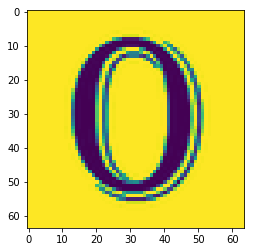

In [4]:
# Example of a picture
index = 6
#train_label_orig=train_label_orig.T
plt.imshow(train_data_orig[index])
print ("y = " + str(np.squeeze(train_label_orig[index,: ])))

### Data Scaling & converting into Tensors

In [5]:
train_data = train_data_orig/255.
vali_data = vali_data_orig/255.
train_data=train_data.reshape(train_data.shape[0],train_data.shape[1],train_data.shape[2],-1)
vali_data=vali_data.reshape(vali_data.shape[0],vali_data.shape[1],vali_data.shape[2],-1)

train_label=utils.to_categorical(train_label_orig, 62)
vali_label=utils.to_categorical(vali_label_orig, 62)

print ("X_train shape: " + str(train_data.shape))
print ("Y_train shape: " + str(train_label.shape))
print ("X_test shape: " + str(vali_data.shape))
print ("Y_test shape: " + str(vali_label.shape))


X_train shape: (37882, 64, 64, 1)
Y_train shape: (37882, 62)
X_test shape: (6262, 64, 64, 1)
Y_test shape: (6262, 62)


In [6]:
# Setting Parameters

input_shape=(64, 64, 1)
num_classes=62
batch_size = 128
epochs = 20

### Model Definition 
###### Relu Activation
###### BatchNormalization (axis=3 (along Filters))
###### MaxPooling(size = 2x2)
###### +
###### Conv2D (16 Filters, kernel_size = 3*3, stride 1*1 )
###### Relu Activation
###### BatchNormalization (axis=3 (along Filters))
###### MaxPooling(size = 2x2)
###### +
###### Conv2D (32 Filters, kernel_size = 3*3, stride 1*1 )
###### Relu Activation
###### BatchNormalization (axis=3 (along Filters))
###### +
###### Conv2D (32 Filters, kernel_size = 3*3, stride 1*1 )
###### Relu Activation
###### +
###### Flatten Layer
###### +
###### Dense Layer(units=512)
###### Relu Activation
###### +
###### Dropout(0.25)
###### +
###### Dense Layer(units=256)
###### Relu Activation
###### +
###### Dense Layer(units=128)
###### Relu Activation
###### +
###### Output Dense Layer(units=62  (same as no of classes))
###### Softmax Activation

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(16, kernel_size=(3, 3),
                 activation='relu',data_format='channels_last',input_shape=input_shape))
layers.BatchNormalization(axis=3)
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
layers.BatchNormalization(axis=3)
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
layers.BatchNormalization(axis=3)
model.add(layers.Conv2D(32, (1, 1), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(units=62, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 32)        1056      
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
__________

In [12]:
#Using ImageGenerator

#preprocessing.image import ImageDataGenerator
from tensorflow.contrib.keras import preprocessing

gen = preprocessing.image.ImageDataGenerator(rotation_range=20, width_shift_range=0.2,height_shift_range=0.2)

test_gen = preprocessing.image.ImageDataGenerator()

train_generator = gen.flow(train_data, train_label, batch_size=batch_size)
test_generator = test_gen.flow(vali_data, vali_label, batch_size=batch_size)


model.fit_generator(train_generator, steps_per_epoch=37882//128, epochs=50, 
                    validation_data=test_generator, validation_steps=6262//128)

Epoch 1/1
295/295 [==============================] - 185s - loss: 1.3025 - acc: 0.5928 - val_loss: 0.7701 - val_acc: 0.7440


### Fit the Mode on Training Data

### Accuracy on Validation Data

In [13]:
score = model.evaluate(vali_data, vali_label, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.768343505426
Test accuracy: 0.744171191294


In [14]:
# Read Test Data and convert into 64*64 shape 
test_data=[]
image_name=[]

for image_path in glob.glob("test_set\*.png"):
    imag=Image.open(image_path)
    imag=imag.resize((64,64),Image.ANTIALIAS)
    test_data.append(np.asarray(imag))
    fname=image_path.split('\\')    
    image_name.append(fname[1])

test_data_orig=np.array(test_data)
print("test image data shape",test_data_orig.shape)
image_name_orig=np.array(image_name)
print("image name list shape",image_name_orig.shape)

test_data = test_data_orig/255.
test_data=test_data.reshape(test_data.shape[0],test_data.shape[1],test_data.shape[2],-1)
print ("test_data shape: " + str(test_data.shape))

test image data shape (18848, 64, 64)
image name list shape (18848,)
test_data shape: (18848, 64, 64, 1)


### Predictions on Test Data

In [15]:
predictions = model.predict_classes(test_data)

predictions = list(predictions)
actuals = list(vali_label)

#sub = pd.DataFrame({'Image_name':image_name_orig,'Predictions': predictions})
sub = pd.DataFrame([image_name_orig,predictions])
sub=sub.T
sub.to_csv('./test.txt', index=False,header=False,sep=' ')

18848/18848 [==============================] - 35s    
